In [1]:
from parsers_interaction import *
from rdkit import Chem
import torch
import matplotlib.pyplot as plt

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path_ligand = "../../dataset2016/10gs/10gs_ligand.mol2"
path_protein = "../../dataset2016/10gs/10gs_pocket.pdb"

In [1]:
import os
def read_dataset(directory, ligand_file_extention, protein_file_extention):
    '''
    from directory returns a list of pdb_id, path to protein, path to ligand
    The directory contains compound folders (each has an ID with 4 letters,
    ex. abcd) with 4 files:
    - abcd_protein.pdb
    - abcd_pocket.pdb
    - abcd_ligand.sdf
    - abcd_ligand.mol2
    '''
    assert ligand_file_extention in ('sdf', 'mol2')
    assert protein_file_extention in ('protein', 'pocket', 'processed')
    molecules_files = []
    for folder_name in os.listdir(directory):
        if len(folder_name) == 4:
            folder_dir = os.path.join(directory, folder_name)
            files = os.listdir(folder_dir)
            compound_id = folder_name

            for file in files:
                if file.endswith(protein_file_extention + '.pdb'):
                    file_protein = file
                elif file.endswith('ligand.' + ligand_file_extention):
                    file_ligand = file
            # only add molecule if affinity is not uncertain
            molecules_files += [
                (compound_id, os.path.join(folder_dir, file_protein),
                    os.path.join(folder_dir,
                                file_ligand))
            ]
    return molecules_files

In [2]:
pdb_files = read_dataset("../../dataset2016", "mol2", "pocket")

In [6]:
len(pdb_files)

13282

In [18]:
atoms_ligand = {}
atoms_protein = {}
for pdb_id, path_protein, path_ligand in pdb_files:
    ligand = Chem.MolFromMol2File(path_ligand, sanitize=True, removeHs=True)
    protein = Chem.MolFromPDBFile(path_protein, flavor=True, sanitize=True, removeHs=True)
    if ligand is not None and protein is not None:
        for atom in ligand.GetAtoms():
            atom_symbol = atom.GetSymbol()
            if atom_symbol not in atoms_ligand:
                atoms_ligand[atom_symbol] = 1
            else:
                atoms_ligand[atom_symbol] += 1
        for atom in protein.GetAtoms():
            atom_symbol = atom.GetSymbol()
            if atom_symbol not in atoms_protein:
                atoms_protein[atom_symbol] = 1
            else:
                atoms_protein[atom_symbol] += 1

[22:24:08] sanitise [22:24:08] 4iu4_ligand: [22:24:26] Explicit valence for atom # 8 C, 5, is greater than permitted
[22:24:26] sanitise [22:24:26] 4iu4_ligand: [22:24:26] Explicit valence for atom # 1 C, 5, is greater than permitted
[22:24:26] sanitise [22:24:26] 3fy0_ligand: [22:24:27] Explicit valence for atom # 3 C, 5, is greater than permitted
[22:24:27] sanitise [22:24:27] 4ob1_ligand: [22:24:27] 6rsa_ligand: Warning - no explicit hydrogens in mol2 file but needed for formal charge estimation.
[22:24:27] Unusual charge on atom 20 number of radical electrons set to zero
[22:24:27] Explicit valence for atom # 2 C, 5, is greater than permitted
[22:24:27] sanitise [22:24:27] 4rlp_ligand: [22:24:27] Can't kekulize mol.  Unkekulized atoms: 33 34 35 37 38
[22:24:27] sanitise [22:24:27] 3v9b_ligand: [22:24:27] Unusual charge on atom 41 number of radical electrons set to zero
[22:24:27] Explicit valence for atom # 169 O, 3, is greater than permitted
[22:24:27] Explicit valence for atom # 

In [19]:
print("atoms_ligand: ", atoms_ligand)
print("atoms_protein: ", atoms_protein)

atoms_ligand:  {'O': 74931, 'C': 284248, 'N': 56909, 'S': 4408, 'Cl': 1855, 'Br': 405, 'F': 3241, 'P': 2581, 'B': 132, 'I': 156, 'V': 2, 'Fe': 16, 'Ru': 10, 'Mg': 1, 'Se': 5, 'Pt': 2, 'H': 9, 'Hg': 1, 'Re': 1, 'Sb': 1, 'Cu': 1, 'Si': 4, 'As': 2, 'Be': 1, 'Rh': 1}
atoms_protein:  {'N': 858049, 'C': 3282702, 'O': 1134504, 'Zn': 1406, 'S': 30209, 'K': 16, 'Se': 132, 'Mg': 738, 'Ca': 336, 'Mn': 337, 'Fe': 80, 'Na': 107, 'Ni': 71, 'P': 76, 'Cu': 12, 'Co': 93, 'Cs': 1, 'Sr': 1, 'Cd': 29, 'Hg': 5, 'Ga': 1}


In [1]:
import torch

/home/sofiaguerreiro/molecules-binding/env_mol_bind/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = torch.load("../../datasetsprocessed/0909_experiment_with_edges")

/home/sofiaguerreiro/molecules-binding/env_mol_bind/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)


In [4]:
dataset[0]

Data(x=[792, 59], y=[2], pos=[792, 3], edge_index_1=[2, 1520], edge_index_2=[2, 7612], edge_attr_1=[1520, 13], edge_attr_2=[7612, 10])

In [2]:
# dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat")
dataset = torch.load("../../datasetsprocessed/0908_interactionNet_8_2016_final_chemical_feat_core_set")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [3]:
list_of_affinities = []
for graph in dataset:
    # get affinity
    affinity = graph.y[0]
    list_of_affinities.append(float(affinity))

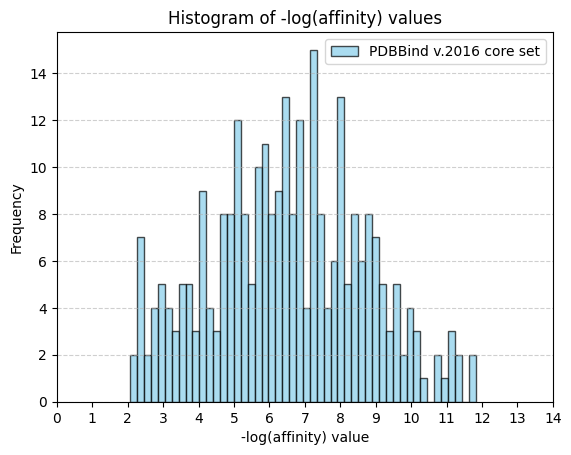

In [6]:
plt.hist(list_of_affinities, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("-log(affinity) value")
plt.ylabel("Frequency")
plt.title("Histogram of -log(affinity) values")

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(range(0, 15), labels=[f'{i}' for i in range(0, 15)])

plt.legend(['PDBBind v.2016 core set'])

plt.savefig('affinity_histogram.pdf', dpi=300, bbox_inches='tight')

plt.show()


### Storing a pandas dataframe with the names of the complexes and which dataset they belong to

In [21]:
import os
import pandas as pd

pdb_ids_core = os.listdir("../../CASF2016/")
data_core = {"pdb_id": pdb_ids_core, "dataset2016": ["core-set"] * len(pdb_ids_core)}
df1 = pd.DataFrame(data_core)
df1.set_index("pdb_id", inplace=True)

pdb_ids_refined = os.listdir("../../dataset2016_complete/refined-set/")
pdb_ids_refined = [pdb_id for pdb_id in pdb_ids_refined if pdb_id not in pdb_ids_core]
data_refined = {"pdb_id": pdb_ids_refined, "dataset2016": ["refined-set"] * len(pdb_ids_refined)}
df2 = pd.DataFrame(data_refined)
df2.set_index("pdb_id", inplace=True)


pdb_ids_general = os.listdir("../../dataset2016_complete/general-set-except-refined/")
data_general = {"pdb_id": pdb_ids_general, "dataset2016": ["general-set-except-refined"] * len(pdb_ids_general)}
df3 = pd.DataFrame(data_general)
df3.set_index("pdb_id", inplace=True)

# join dataframes
df = pd.concat([df1, df2, df3], axis=0)
# save dataframe
df.to_csv("../../pdb_ids_dataset2016.csv")

In [22]:
df.value_counts()

dataset2016               
general-set-except-refined    9226
refined-set                   3772
core-set                       285
Name: count, dtype: int64

### Can we remove waters?

In [72]:
from rdkit import Chem
import numpy as np
import torch
(ligand_coord, atoms_ligand, edges_ligand, edges_length_ligand,
             num_atoms_ligand) = molecule_info("../../dataset2016/1a9m/1a9m_ligand.mol2", "Ligand", 0, False)

atom_features:  42


In [73]:
(protein_coord, atoms_protein, edges_protein,
                 edges_length_protein,
                 num_atoms_protein) = molecule_info("../../dataset2016/1a9m/1a9m_pocket.pdb", "Protein", 33, False)

439 is water
440 is water
441 is water
442 is water
443 is water
444 is water
445 is water
446 is water
447 is water
448 is water
449 is water
450 is water
atom_features:  439


### Create Refined Set 2016 from all complexes

In [1]:
import pandas as pd
df = pd.read_csv("../../pdb_ids_dataset2016.csv")

In [3]:
# make index be the pdb_id
df.set_index("pdb_id", inplace=True)

In [10]:
df.value_counts()

dataset2016               
general-set-except-refined    9226
refined-set                   3772
core-set                       285
Name: count, dtype: int64

In [8]:
# access row with pdb_id 4de3
df["dataset2016"].loc["4de3"]

'core-set'

In [13]:
# list all pdb_ids in the core set or general-except-refined set
core_set = df[df["dataset2016"] == "core-set"].index.tolist()
general_except_refined_set = df[df["dataset2016"] == "general-set-except-refined"].index.tolist()

In [9]:
import torch
dataset = torch.load("../../datasetsprocessed/0920_dataset2016")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [16]:
dataset

GraphDataset(12830)

In [17]:
dataset.remove_graph_by_ids(core_set)
dataset

GraphDataset(12545)

In [18]:
dataset.remove_graph_by_ids(general_except_refined_set)

In [19]:
dataset

GraphDataset(3745)

In [20]:
# save dataset
torch.save(dataset, "../../datasetsprocessed/0929_dataset2016_refined")

### create different sets from 2020 all dataset

In [8]:
import torch

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
dataset = torch.load("../../datasetsprocessed/0915_pdbbind2020_joined_edges_all_dataset")

In [2]:
import pandas as pd
df = pd.read_csv("../../LP_PDBBind.csv")

In [3]:
# change name of Unnamed: 0 to pdb_id
df.rename(columns={"Unnamed: 0": "pdb_id"}, inplace=True)

In [4]:
# set pdb_id as index
df.set_index("pdb_id", inplace=True)

In [4]:
df.head()

,header,smiles,category,seq,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,value,covalent
pdb_id,,,,,,,,,,,,,,,
6r8o,isomerase,CSc1ccccc1[C@H]1CCCN1C(=O)CNC(=O)NCc1ccc2c(c1)...,refined,GNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFG...,1.36,2019-11-27,isomerase,test,True,True,True,False,Kd=0.006uM,8.22,False
3fh7,hydrolase/hydrolase inhibitor,O=C([O-])CCC[N@H+]1CCC[C@H]1COc1ccc(Oc2ccc(Cl)...,refined,VDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNL...,2.05,2010-01-05,hydrolase,test,True,True,True,False,Kd=25nM,7.60,False
4b7r,hydrolase,CCC(CC)O[C@@H]1C[C@H](C(=O)[O-])C[C@H]([NH3+])...,refined,VKLAGNSSLCPVSGWAIYSKDNSVRIGSKGDVFVIREPFISCSPLE...,1.90,2012-10-03,hydrolase,NaN,True,True,True,False,Ki=0.23nM,9.64,False
3qfd,immune system,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](C)NC(=O)[C@...,refined,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,1.68,2011-09-28,other,train,False,False,False,False,Kd=68uM,4.17,False
3fvn,membrane protein,[NH3+][C@@H](C[C@]1(C(=O)[O-])C[C@H]2OCC[C@@H]...,refined,ANRTLIVTTILEEPYVMYRKSDKPLYGNDRFEGYCLDLLKELSNIL...,1.50,2010-01-19,membrane,val,True,True,True,False,Ki=169nM,6.77,False


In [14]:
df.category.value_counts()

category
general    14108
refined     5050
core         285
Name: count, dtype: int64

In [15]:
pdb_ids_core = df[df["category"] == "core"].index.tolist()

In [17]:
dataset.remove_graph_by_ids(pdb_ids_core)

In [18]:
# store new dataset
torch.save(dataset, "../../datasetsprocessed/0930_pdbbind2020_general_refined")

In [19]:
pdb_ids_general = df[df["category"] == "general"].index.tolist()

In [20]:
dataset.remove_graph_by_ids(pdb_ids_general)

In [21]:
torch.save(dataset, "../../datasetsprocessed/0930_pdbbind2020_refined")

## Create dataset like the paper

In [5]:
df

,header,smiles,category,seq,resolution,date,type,new_split,CL1,CL2,CL3,remove_for_balancing_val,kd/ki,value,covalent
pdb_id,,,,,,,,,,,,,,,
6r8o,isomerase,CSc1ccccc1[C@H]1CCCN1C(=O)CNC(=O)NCc1ccc2c(c1)...,refined,GNPLVYLDVDANGKPLGRVVLELKADVVPKTAENFRALCTGEKGFG...,1.36,2019-11-27,isomerase,test,True,True,True,False,Kd=0.006uM,8.22,False
3fh7,hydrolase/hydrolase inhibitor,O=C([O-])CCC[N@H+]1CCC[C@H]1COc1ccc(Oc2ccc(Cl)...,refined,VDTCSLASPASVCRTKHLHLRCSVDFTRRTLTGTAALTVQSQEDNL...,2.05,2010-01-05,hydrolase,test,True,True,True,False,Kd=25nM,7.60,False
4b7r,hydrolase,CCC(CC)O[C@@H]1C[C@H](C(=O)[O-])C[C@H]([NH3+])...,refined,VKLAGNSSLCPVSGWAIYSKDNSVRIGSKGDVFVIREPFISCSPLE...,1.90,2012-10-03,hydrolase,NaN,True,True,True,False,Ki=0.23nM,9.64,False
3qfd,immune system,CC[C@H](C)[C@H](NC(=O)CNC(=O)[C@H](C)NC(=O)[C@...,refined,GSHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRME...,1.68,2011-09-28,other,train,False,False,False,False,Kd=68uM,4.17,False
3fvn,membrane protein,[NH3+][C@@H](C[C@]1(C(=O)[O-])C[C@H]2OCC[C@@H]...,refined,ANRTLIVTTILEEPYVMYRKSDKPLYGNDRFEGYCLDLLKELSNIL...,1.50,2010-01-19,membrane,val,True,True,True,False,Ki=169nM,6.77,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6npt,transferase,CC(C)(C)c1ccc(C(=O)Nc2cc(-c3ccccc3)nn2-c2ccccc...,general,IENCVHHIKRRDIVLKWELGEGAFGKVFLAECHNLLPEQDKMLVAV...,2.19,2019-05-22,transferase,test,True,False,False,False,IC50=68.3nM,7.17,False
3pax,transferase,COc1cccc(C(N)=O)c1,general,KSKLAKPIQDLIKMIFDVESMKKAMVEFEIDLQKMPLGKLSKRQIQ...,2.40,1998-05-27,transferase,val,True,False,False,False,IC50=10uM,5.00,False
5ezz,hydrolase/inhibitor,Cc1cc([C@@]2(c3cccc(-c4cncc(Cl)c4)c3)COC(=[NH2...,general,RGSFVEMVDNLRGKSGQGYYVEMTVGSPPQTLNILVDTGSSNFAVG...,2.10,2016-02-24,hydrolase,test,True,False,False,False,IC50=145nM,6.84,False


In [6]:
df["new_split"].value_counts()

new_split
train    11513
test      4860
val       2422
Name: count, dtype: int64

In [26]:
df["new_split"].loc["4b7r"]

nan

In [10]:
pdb_ids_nan = df[df["new_split"].isna()].index.tolist()
pdb_ids_test = df[df["new_split"] == "test"].index.tolist()
pdb_ids_val = df[df["new_split"] == "val"].index.tolist()
pdb_ids_train = df[df["new_split"] == "train"].index.tolist()

In [40]:
dataset.remove_graph_by_ids(pdb_ids_nan)
dataset.remove_graph_by_ids(pdb_ids_test)
# dataset.remove_graph_by_ids(pdb_ids_val)
dataset.remove_graph_by_ids(pdb_ids_train)

In [41]:
torch.save(dataset, "../../datasetsprocessed/1003_pdbbind2020_val_paper")

In [42]:
dataset

GraphDataset(2344)

### CL1 filtering for the datasets

In [6]:
df['CL1'].value_counts()

CL1
True     14324
False     5119
Name: count, dtype: int64

In [7]:
pdb_ids_to_remove = df[df['CL1'] == False].index.tolist()

In [11]:
import torch
dataset1 = torch.load("../../datasetsprocessed/1003_pdbbind2020_train_paper")
dataset2 = torch.load("../../datasetsprocessed/1003_pdbbind2020_val_paper")
dataset3 = torch.load("../../datasetsprocessed/1003_pdbbind2020_test_paper")

/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sofiaguerreiro/molecules-binding/.env/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


In [12]:
print(len(dataset1), len(dataset2), len(dataset3))

11049 2344 4736


In [13]:
dataset1.remove_graph_by_ids(pdb_ids_to_remove)
dataset2.remove_graph_by_ids(pdb_ids_to_remove)
dataset3.remove_graph_by_ids(pdb_ids_to_remove)

In [14]:
print(len(dataset1), len(dataset2), len(dataset3))

7249 1918 4196


In [15]:
torch.save(dataset1, "../../datasetsprocessed/1003_pdbbind2020_train_paper_cl1")
torch.save(dataset2, "../../datasetsprocessed/1003_pdbbind2020_val_paper_cl1")
torch.save(dataset3, "../../datasetsprocessed/1003_pdbbind2020_test_paper_cl1")